In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [28]:
n_pts = 500
# nested list for center of each of the 3 clusters
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
# create data points with corresponding label, labels correspond to 0, 1, and 2 representing the 5 mutually exclusive classes of different center coordinates
X, y = datasets.make_blobs(n_pts, random_state = 123, centers = centers, cluster_std = 0.4)


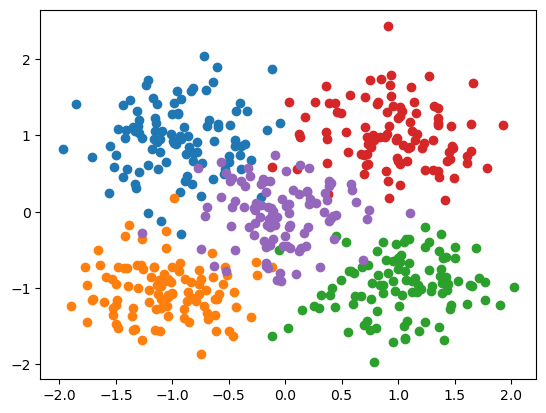

In [29]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [30]:
print(y)
# hot encode labels to eliminate unecessary dependencies within data labels -> doesnt create unjustified relationships with data labels
# 2nd arguament: 3 = number of data classes
y_cat = to_categorical(y, 5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [31]:
model = Sequential()
# sigmoid wont work use softmax, model with 3 output nodes 2 input nodes
model.add(Dense(units = 5, input_shape = (2,), activation = 'softmax'))
# run adam model with learning rate of 0.1 and cross entropy error function
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

c:\Users\44780\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# train model
h = model.fit(x=X, y=y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2062 - loss: 1.7749      
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7577 - loss: 0.7966 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8894 - loss: 0.5167 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9311 - loss: 0.3786 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9449 - loss: 0.3195 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9537 - loss: 0.2764 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9329 - loss: 0.2842 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9350 - loss: 0.2726 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9501 - loss: 0.2482 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9540 - loss: 0.2320 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9496 - loss: 0.2220 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

Text(0.5, 1.0, 'accuracy')

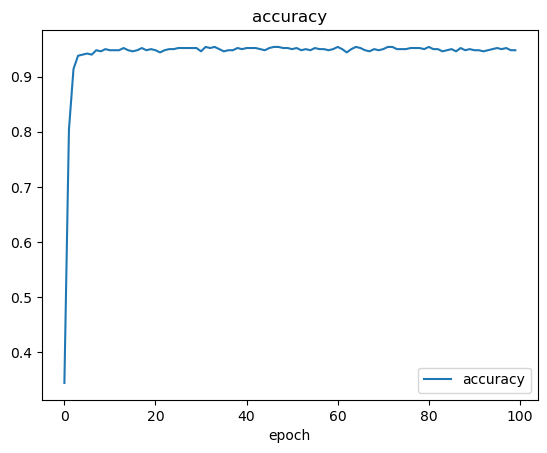

In [33]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

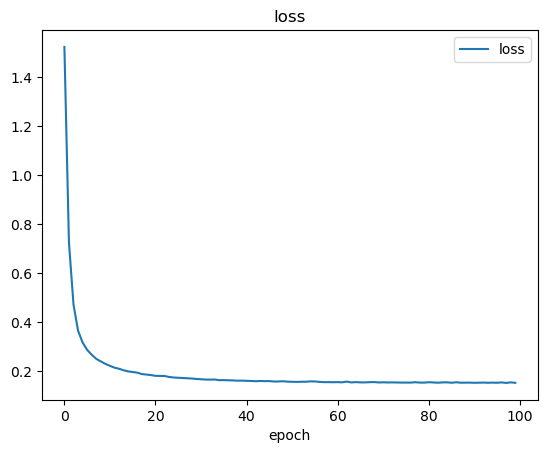

In [34]:
# plot loss function results
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [35]:
# function to plot output where X is the dataset, y is the labelled matrix data, and model is the sequential model
# correlates each specific coordinate with its respecitve preduction probability and plots contour zones 
# yellow = 1 purple = 0 
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    # return coordinate matricies from the input of the coordinate vectors
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    pred_function = np.argmax(pred_func, axis = 1)
    Z = pred_function.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step


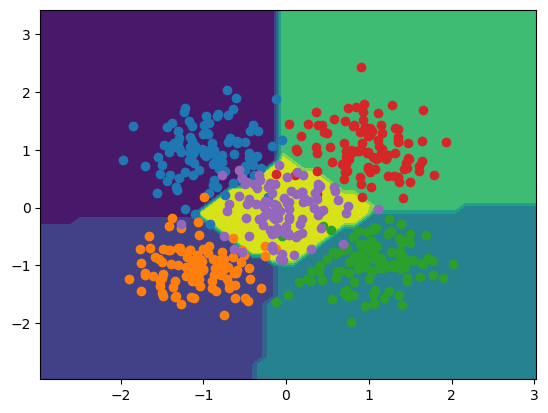

In [36]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1], label = 'Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label = 'Class 1')
plt.scatter(X[y==2, 0], X[y==2, 1], label = 'Class 2')
plt.scatter(X[y==3, 0], X[y==3, 1], label = 'Class 3')
plt.scatter(X[y==4, 0], X[y==4, 1], label = 'Class 4')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: [4]


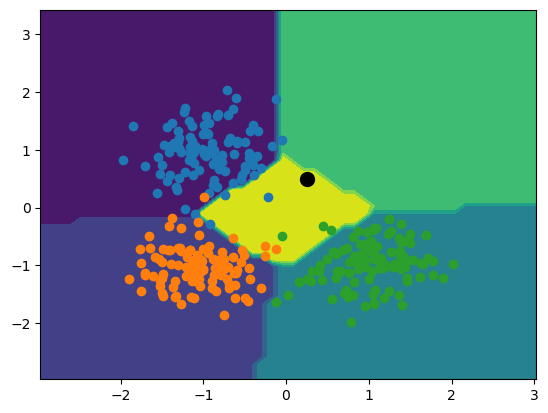

In [37]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
x = 0.25
y = 0.5
point_array = np.array([[x,y]])
prediction = model.predict(point_array)
predicted_class = np.argmax(prediction, axis = 1)
print('Predicted Class:', predicted_class)
plt.plot([x],[y], marker = 'o', markersize = 10, color = 'black')
plt.show()